# Music Machine

In [1]:
import spotipy.util as util
import spotipy
import os.path as path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

username = 'ninahew'
client_id ='a758a8092e3b45949388c4123f79948f'
client_secret = '9852f1ad63d64a4284bf4496e1bd2115'
redirect_uri = 'http://localhost:7777/callback'
scope = 'user-read-recently-played'
user_id = 'spotify:user:ninahew'

from spotipy.oauth2 import SpotifyClientCredentials

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, 
                                                                              client_secret=client_secret))

In [2]:
# psb_uri = 'spotify:artist:2ycnb8Er79LoH2AsR5ldjh'

In [3]:
psb_search = spotify.search(q='pet shop boys', type='artist')
psb_id = psb_search['artists']['items'][0]['id']
psb_id

'2ycnb8Er79LoH2AsR5ldjh'

In [4]:
df = pd.DataFrame()
filepath = "../data/PSB data.csv"
if not path.exists(filepath):
    artist = psb_id
    albums = spotify.artist_albums(artist)
    for album in albums['items']:
        tracks = spotify.album_tracks(album['id'])
        for track in tracks['items']:
                full_track = spotify.track(track['id'])
                audio_features = spotify.audio_features(track['id'])[0]
                audio_features['track_name'] = track['name']
                audio_features['album_name'] = album['name']
                audio_features['album_type'] = album['album_type']
                audio_features['artist'] = ', '.join(sorted([artist['name'] for artist in track['artists']]))
                audio_features['release_date'] = album['release_date']
                audio_features['popularity'] = full_track['popularity']
                df = df.append(audio_features, ignore_index=True)
        df.to_csv(path_or_buf = filepath)
else:
    df = pd.read_csv(filepath)
    
df.sample(3)

,Unnamed: 0,acousticness,album_name,album_type,analysis_url,artist,danceability,duration_ms,energy,id,...,popularity,release_date,speechiness,tempo,time_signature,track_href,track_name,type,uri,valence
299,299,0.000021,Yes: Further Listening 2008 - 2010 (2018 Remas...,album,https://api.spotify.com/v1/audio-analysis/3rET...,Pet Shop Boys,0.517,227813.0,0.836,3rETmXosxgXDccf9wZBKXm,...,13.0,2009-03-18,0.0372,94.034,4.0,https://api.spotify.com/v1/tracks/3rETmXosxgXD...,All over the World - New Version; 2018 Remaster,audio_features,spotify:track:3rETmXosxgXDccf9wZBKXm,0.4760
219,219,0.957000,The Most Incredible Thing,album,https://api.spotify.com/v1/audio-analysis/6wz2...,"Bartek Bober, Dominic Wheeler, Joris Bartsch B...",0.408,107356.0,0.305,6wz2AttY8rjrAxI4YLM2uV,...,11.0,2011,0.0266,100.101,4.0,https://api.spotify.com/v1/tracks/6wz2AttY8rjr...,Prologue,audio_features,spotify:track:6wz2AttY8rjrAxI4YLM2uV,0.0514
239,239,0.170000,The Most Incredible Thing,album,https://api.spotify.com/v1/audio-analysis/7msK...,"Bartek Bober, Dominic Wheeler, Joris Bartsch B...",0.311,202414.0,0.715,7msK0Of9SayE6VtZ4k384L,...,7.0,2011,0.0466,115.079,4.0,https://api.spotify.com/v1/tracks/7msK0Of9SayE...,The Wedding,audio_features,spotify:track:7msK0Of9SayE6VtZ4k384L,0.1130


In [5]:
len(df)

308

In [6]:
df.columns

Index(['Unnamed: 0', 'acousticness', 'album_name', 'album_type',
       'analysis_url', 'artist', 'danceability', 'duration_ms', 'energy', 'id',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'release_date', 'speechiness', 'tempo', 'time_signature', 'track_href',
       'track_name', 'type', 'uri', 'valence'],
      dtype='object')

In [7]:
df.drop(columns= ['analysis_url', 'release_date', 'track_href', 'type', 'uri'], inplace = True)
df.drop(columns='id', inplace = True)
df.drop(columns = ['album_name','album_type', 'artist', 'time_signature', 'track_name'], inplace = True)
df.drop(columns = 'Unnamed: 0', inplace = True)

In [8]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,0.000029,0.488,268787.0,0.957,0.009040,0.0,0.554,-6.115,1.0,12.0,0.0592,124.997,0.531
1,0.219000,0.577,215333.0,0.633,0.003960,0.0,0.116,-7.920,1.0,11.0,0.0361,130.081,0.204
2,0.001990,0.575,231347.0,0.894,0.210000,8.0,0.463,-6.073,1.0,11.0,0.0391,127.010,0.320
3,0.022400,0.643,206160.0,0.736,0.000059,9.0,0.340,-6.159,0.0,14.0,0.0428,124.993,0.696
4,0.189000,0.510,300520.0,0.602,0.685000,4.0,0.118,-9.508,0.0,7.0,0.0313,130.021,0.310


In [44]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# scaler = MinMaxScaler()
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df_normalized.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,-0.637357,-0.594109,-0.020469,1.042890,-0.656240,-1.473942,0.660524,0.519769,0.937043,-0.017450,0.538678,0.182679,0.485874
1,0.544455,0.135603,-0.605458,-0.747813,-0.672269,-1.473942,-0.815711,-0.336088,0.937043,-0.104136,-0.389916,0.516887,-0.988041
2,-0.626776,0.119205,-0.430204,0.694698,-0.022145,0.824661,0.353818,0.539684,0.937043,-0.104136,-0.269320,0.315008,-0.465184
3,-0.516621,0.676738,-0.705845,-0.178546,-0.684576,1.111987,-0.060742,0.498906,-1.067187,0.155922,-0.120584,0.182416,1.229593
4,0.382541,-0.413731,0.326809,-0.919145,1.476636,-0.324640,-0.808971,-1.089052,-1.067187,-0.450880,-0.582871,0.512943,-0.510258


In [45]:
df_normalized.dtypes

acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                 float64
liveness            float64
loudness            float64
mode                float64
popularity          float64
speechiness         float64
tempo               float64
valence             float64
dtype: object

<AxesSubplot:>

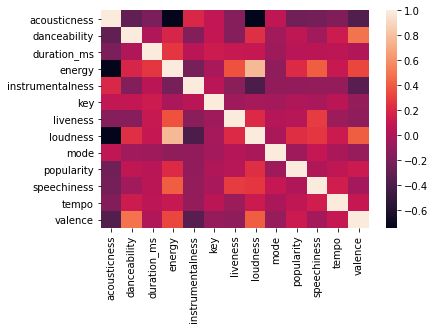

In [46]:
import seaborn as sns
sns.heatmap(df_normalized.corr())
# no real multi collinearity and no individual factor jumps out to influence popularity

In [47]:
X = df_normalized[['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence']]
y = df_normalized['popularity']

print(X)
print(y)

     acousticness  danceability  duration_ms    energy  instrumentalness  \
0       -0.637357     -0.594109    -0.020469  1.042890         -0.656240   
1        0.544455      0.135603    -0.605458 -0.747813         -0.672269   
2       -0.626776      0.119205    -0.430204  0.694698         -0.022145   
3       -0.516621      0.676738    -0.705845 -0.178546         -0.684576   
4        0.382541     -0.413731     0.326809 -0.919145          1.476636   
..            ...           ...          ...       ...               ...   
303     -0.550083     -0.200556    -0.675498  0.921299         -0.684448   
304     -0.592127     -1.225433    -0.718102  0.523365         -0.672143   
305      0.825105      1.373655    -1.785339 -2.118474         -0.684764   
306      0.889871      2.947866    -1.552455 -2.499827         -0.675834   
307     -0.600762     -1.020458    -0.695777 -1.427617         -0.487871   

          key  liveness  loudness      mode  speechiness     tempo   valence  
0   -1.4

In [48]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)
lasso_model = Lasso(alpha= 1.0)
lasso_model.fit(X_train,y_train).coef_ 

array([-0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0., -0.,  0.,  0.])

In [49]:
df_normalized.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'valence'],
      dtype='object')

In [55]:
y_pred = lasso_model.predict(X_train)
first_test = pd.DataFrame({'test':y_train, 'predicted':y_pred})
first_test

,test,predicted
110,2.323075,0.018031
52,-0.884311,0.018031
26,-0.797625,0.018031
237,-0.450880,0.018031
248,-0.884311,0.018031
...,...,...
66,-0.884311,0.018031
53,-0.884311,0.018031
79,-0.970997,0.018031
280,0.329295,0.018031


<AxesSubplot:>

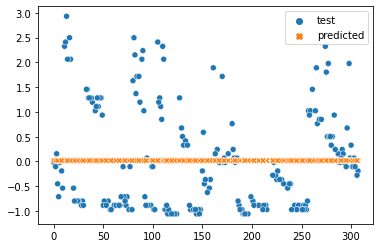

In [51]:
sns.scatterplot(data = first_test)

In [52]:
from sklearn.linear_model import ElasticNet

elastic_model = ElasticNet(alpha = 1.0)
elastic_model.fit(X_train,y_train).coef_

array([-0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0., -0.,  0.,  0.])

In [53]:
y_pred_elastic = elastic_model.predict(X_train)
second_test = pd.DataFrame({'test':y_train, 'predicted':y_pred_elastic})
second_test

,test,predicted
110,2.323075,0.018031
52,-0.884311,0.018031
26,-0.797625,0.018031
237,-0.450880,0.018031
248,-0.884311,0.018031
...,...,...
66,-0.884311,0.018031
53,-0.884311,0.018031
79,-0.970997,0.018031
280,0.329295,0.018031


In [58]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train,y_train).coef_ 

array([-0.26932335, -0.11991216, -0.03934728, -0.02115052, -0.06086581,
        0.12799641,  0.06102302,  0.04052287, -0.04248249, -0.07120105,
        0.05419633,  0.0813845 ])

In [74]:
y_pred_linear = linear_model.predict(X_train)
third_test = pd.DataFrame({'test':y_train, 'predicted':y_pred_linear})
third_test

,test,predicted
110,2.323075,0.402956
52,-0.884311,-0.049536
26,-0.797625,-0.033073
237,-0.450880,-1.033206
248,-0.884311,0.352677
...,...,...
66,-0.884311,0.180051
53,-0.884311,0.041205
79,-0.970997,0.372561
280,0.329295,0.416473


In [75]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_linear)

0.09953644919999993

In [76]:
y_pred_linear = linear_model.predict(X_test)
third_test = pd.DataFrame({'test':y_test, 'predicted':y_pred_linear})
third_test

,test,predicted
75,-0.884311,0.112880
7,-0.450880,0.118563
154,-0.537566,-0.334349
56,-0.884311,0.018531
217,-0.970997,0.027439
...,...,...
209,-0.884311,-0.486367
263,0.762725,0.125170
85,1.369528,0.225787
31,-0.797625,0.017634


In [77]:
r2_score(y_test, y_pred_linear)

-0.07982927092445835